Amount Pending : This is the EMI amount pending.
    
State : The borrower’s state.
    
Tenure : Total tenure of the borrower. This is the total tenure of the loan.
    
Interest Rate : Interest rate of the loan.
    
City : The city of the borrower.

Bounce String : This is a string that explain’s customer’s bounce behaviour since the disbursal of the loan - 
    bounce means that the customer did not end up making the payment
• S or H- No bounce in that month
• B or L - Bounce in that month
• FEMI - first EMI - no known behaviour
• Last character denotes the last month - first character denotes the first month on book - 
for example SSB means that customer was on book for 4 months and he has bounced the in the last month

Disbursed Amount : The total disbursed amount of the loan.
    
Loan Number : The unique identifier for the loan.

In [1]:
import pandas as pd

In [70]:
df = pd.read_csv('Data_Analyst_Assignment_Dataset.csv')
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24582 entries, 0 to 24581
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount Pending    24582 non-null  int64  
 1   State             24582 non-null  object 
 2   Tenure            24582 non-null  int64  
 3   Interest Rate     24582 non-null  float64
 4   City              24582 non-null  object 
 5   Bounce String     24582 non-null  object 
 6   Disbursed Amount  24582 non-null  int64  
 7   Loan Number       24582 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ MB


In [4]:
df.isnull().sum()

Amount Pending      0
State               0
Tenure              0
Interest Rate       0
City                0
Bounce String       0
Disbursed Amount    0
Loan Number         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
for i in df.columns:
    print( i,df[i].unique(),'\n')

Amount Pending [ 963 1194 1807 ... 3289 4899 4599] 

State ['Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Tamil Nadu' 'Telangana'
 'Kerala' 'Andhra Pradesh'] 

Tenure [11 14 10 17  7  8 18 24 15] 

Interest Rate [ 7.69  6.16  4.24  4.7   4.41  4.36  5.77  6.47  6.03  4.8   4.66  5.44
  4.5   6.58  5.67  6.88  6.6   5.65  4.09  5.14  5.81  5.31  4.1   4.75
  4.98  6.52  6.45  6.56  3.84  5.33  4.35  5.04  4.58  5.73  5.36  4.01
  4.85  5.11  4.88  5.58  4.61  6.94  4.64  5.26  7.1   4.46  5.22  5.02
  5.41  6.41  4.43  5.18  4.91  3.94  4.47  6.14  5.8   4.52  5.92  5.06
  5.55  6.36  5.38  4.06  6.9   5.05  4.26  4.18  5.19  4.15  6.35  5.99
  6.    4.08  5.    6.95  4.4   5.64  5.96  4.93  5.48  7.47  9.02  5.66
  5.78  6.44  7.04  6.37  4.57  4.77  5.93  5.17  4.87  5.3   4.86  5.97
  4.89  5.28  4.94  5.43  5.45  6.61  7.    6.11  7.38  5.89  5.72  4.95
  6.08  6.55  5.32  5.25  5.54  4.71 12.83  4.82  5.63  6.1   5.68  4.22
  6.72  4.51  6.17  5.79  4.74  6.31  7.36  5.34 18.1  21.92

In [7]:
df.describe()

,Amount Pending,Tenure,Interest Rate,Disbursed Amount
count,24582.000000,24582.000000,24582.000000,24582.000000
mean,1791.172687,9.415263,0.934960,17705.195468
std,937.565507,3.238904,3.114732,14192.671509
min,423.000000,7.000000,0.000000,2793.000000
25%,1199.000000,8.000000,0.000000,9857.750000
50%,1593.000000,8.000000,0.000000,13592.000000
75%,2083.000000,11.000000,0.000000,19968.000000
max,13349.000000,24.000000,37.920000,141072.000000


## Derive values from the raw data

When a data analyst gets data from the lender at DPDzero, a lot of information should be derived and data set needs to be enhanced. As part of this assignment, derive the following values
Calculate the risk labels for all the borrowers. 

Unknown risk : New customers

Low risk : Customers who have not bounced in the last 6 months

Medium Risk : These are customers who have bounced max twice in the last 6 months - The bounce should not have occurred in the last month

High risk : every other customer

In [8]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [9]:
df['Bounce Count'] = df['Bounce String'].apply(lambda x: sum(1 for char in x if char in 'BL'))

In [29]:
def calculate_risk_label(bounce_string):
    bounce_count = bounce_string.count('B') + bounce_string.count('L')
    last_bounce_month = bounce_string[-1]

    if bounce_count == 0 and last_bounce_month not in ('B', 'L') and bounce_string != 'FEMI':
        return 'Low risk'
    elif (bounce_count <= 2) and (last_bounce_month not in ('B', 'L')) and ('B' in bounce_string[:-1] or 'L' in bounce_string[:-1]):
        return 'Medium risk'
    elif bounce_count > 2 or (bounce_count == 2 and last_bounce_month in ('B', 'L')):
        return 'High risk'
    else:
        return 'Unknown risk'

df['Risk Label'] = df['Bounce String'].apply(calculate_risk_label)


In [30]:
df['Risk Label'].value_counts()

Risk Label
Low risk        13463
Unknown risk     4854
Medium risk      3631
High risk        2634
Name: count, dtype: int64

## label all customers based on where they are in their tenure

Early tenure : Customers who are in the book for 3 months

Late tenure : Customers who are 3 months away from closing the loan

Mid tenure : Everyone else

In [69]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Bounce Count,Risk Label,Tenure Label,Ticket Size Cohort,Channel Recommendation
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,0,Low risk,Early tenure,Low ticket size,Whatsapp Bot
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,1,Unknown risk,Early tenure,Low ticket size,Whatsapp Bot
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,2,Medium risk,Early tenure,Medium ticket size,Voice Bot
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,0,Low risk,Early tenure,High ticket size,Whatsapp Bot
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,1,Unknown risk,Early tenure,High ticket size,Voice Bot


In [32]:
def calculate_tenure_label(tenure, bounce_string):
    months_on_book = len(bounce_string)
    
    # Check if the customer is early tenure (in the first 3 months)
    if tenure <= 3 or months_on_book <=3 or bounce_string == 'FEMI':
        return 'Early tenure'
    
    # Check if the customer is late tenure (3 months away from closing the loan)
    elif tenure - months_on_book <= 3:
        return 'Late tenure'
    
    # If the customer is neither early nor late tenure, they are mid tenure
    return 'Mid tenure'

df['Tenure Label'] = df.apply(lambda row: calculate_tenure_label(row['Tenure'], row['Bounce String']), axis=1)


In [68]:
df.sample(5)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Bounce Count,Risk Label,Tenure Label,Ticket Size Cohort,Channel Recommendation
1288,2771,Maharashtra,10,4.15,Nashik,SS,27190,JP6LH,0,Low risk,Early tenure,High ticket size,Whatsapp Bot
11,1349,Karnataka,11,5.44,Bangalore,SSS,14443,CVTKZ,0,Low risk,Early tenure,Low ticket size,Whatsapp Bot
7382,1268,Madhya Pradesh,8,0.00,Ratlam,SSS,10144,YIC9B,0,Low risk,Early tenure,Low ticket size,Whatsapp Bot
10647,1224,Maharashtra,8,0.00,Pune,BBBBS,9792,ET8DA,4,High risk,Late tenure,Low ticket size,Whatsapp Bot
24127,2240,Andhra Pradesh,11,0.00,ANANTHAPUR,SSS,24640,3KVC0,0,Low risk,Early tenure,Medium ticket size,Whatsapp Bot


In [58]:
df['Tenure Label'].value_counts()

Tenure Label
Early tenure    15641
Mid tenure       4498
Late tenure      4443
Name: count, dtype: int64

## Segment borrowers based on ticket size

Distribute the data into 3 cohorts based on ticket size. This is to be done such that sum of amount pending in each cohort should be approximately equal. Apply the following labels on each borrower based on this logic:

In [34]:
import numpy as np

# Define the number of cohorts
num_cohorts = 3

# Sort the DataFrame by amount pending in descending order
df_sorted = df.sort_values(by='Amount Pending', ascending=False)

# Calculate the total amount pending
total_amount_pending = df_sorted['Amount Pending'].sum()

# Calculate the target sum of amount pending for each cohort
target_sum_per_cohort = total_amount_pending // num_cohorts

# Initialize cohorts and their sums
cohorts = {i: [] for i in range(num_cohorts)}
cohort_sums = np.zeros(num_cohorts)

# Iterate over sorted DataFrame and assign borrowers to cohorts
for _, row in df_sorted.iterrows():
    # Find the cohort index with the smallest sum
    min_cohort_index = np.argmin(cohort_sums)
    
    # Assign the borrower to the cohort with the smallest sum
    cohorts[min_cohort_index].append(row)
    cohort_sums[min_cohort_index] += row['Amount Pending']

# Adjust cohorts to balance the sums
for i in range(num_cohorts):
    while cohort_sums[i] > target_sum_per_cohort:
        borrower_to_move = cohorts[i].pop()
        max_cohort_index = np.argmax(cohort_sums)
        cohorts[max_cohort_index].append(borrower_to_move)
        cohort_sums[i] -= borrower_to_move['Amount Pending']
        cohort_sums[max_cohort_index] += borrower_to_move['Amount Pending']

# Convert cohorts to DataFrame and assign cohort labels
for i, cohort in cohorts.items():
    for borrower in cohort:
        df.loc[df['Loan Number'] == borrower['Loan Number'], 'Ticket Size Cohort'] = f"Cohort {i+1}"

# Calculate the sum of amount pending for each cohort
cohort_sums = df.groupby('Ticket Size Cohort')['Amount Pending'].sum()

# Display the sum of amount pending for each cohort
print("Sum of amount pending for each cohort:")
print(cohort_sums)


Sum of amount pending for each cohort:
Ticket Size Cohort
Cohort 1    14671490
Cohort 2    14678618
Cohort 3    14680499
Name: Amount Pending, dtype: int64


In [35]:
df

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Bounce Count,Risk Label,Tenure Label,Ticket Size Cohort,Channel Recommendation
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,0,Low risk,Early tenure,Cohort 1,Whatsapp Bot
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,1,Unknown risk,Early tenure,Cohort 3,Whatsapp Bot
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,2,Medium risk,Early tenure,Cohort 3,Voice Bot
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,0,Low risk,Early tenure,Cohort 2,Whatsapp Bot
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,1,Unknown risk,Early tenure,Cohort 2,Voice Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,0,Unknown risk,Early tenure,Cohort 2,Whatsapp Bot
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9,0,Unknown risk,Early tenure,Cohort 1,Whatsapp Bot
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,0,Unknown risk,Early tenure,Cohort 1,Whatsapp Bot
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72,0,Unknown risk,Early tenure,Cohort 1,Whatsapp Bot


## Give channel spend recommendations

At DPDzero, we employ various channels to communicate with the borrowers so that we can get the repayment done - Different channels have different costs & various degrees of effectiveness.

You are allowed to spend 3 kinds of resources to reduce the overall bounce

1. Whatsapp bot: This is the cheapest medium - it will cost 5 rupees per borrower 
2. Voice bot: This is the mid-cost - it will cost 10 rupees per borrower
3. Human calling: This is the costliest option - it will cost 50 rupees per borrower

Whatsapp bot will work well in any of the following scenarios

1. Customers with great repayment behavior
2. Customers with first EMIs
3. Customers who have low EMIs

Voice bot will work well all the following conditions are met

1. Customer who know Hindi or English 
    1. Metropolitan areas have high probability of english speakers 
    2. People with low interest rates are also typically english speakers
    3. There are many states in India where the borrowers typically know Hindi
2. Customers who have had low bounce behaviour
3. Customers with low or medium sized EMIs

Human calling will work on all scenarios but is the costliest option and you need to use this channel only where absolutely necessary

Your job is to segment the borrowers into these 3 channels of spend category and minimise the overall spend while maximise on time repayment.

In [36]:
# Define channel selection criteria
def channel_recommendation(row):
    # Check criteria for Whatsapp Bot
    if row['Risk Label'] == 'Low risk' or row['Bounce String'] == 'FEMI' or row['Amount Pending'] < 1500:
        return "Whatsapp Bot"
        
    # Check criteria for Voice Bot
    elif (row['State'] in ['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata'] or 
          row['Interest Rate'] < 5.0 or 
          row['Bounce Count'] < 2 or 
          row['Amount Pending'] < 3000 or
          (row['State'] in ['Uttar Pradesh', 'Bihar', 'Rajasthan', 'Haryana', 'Madhya Pradesh'] and row['Interest Rate'] < 8.0)):
        return "Voice Bot"
        
    # If none of the above criteria are met, recommend Human Calling
    else:
        return "Human Calling"

# Apply the function to each row to get channel recommendations
df['Channel Recommendation'] = df.apply(channel_recommendation, axis=1)


In [45]:
df

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Bounce Count,Risk Label,Tenure Label,Ticket Size Cohort,Channel Recommendation
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,0,Low risk,Early tenure,Low ticket size,Whatsapp Bot
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,1,Unknown risk,Early tenure,Low ticket size,Whatsapp Bot
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,2,Medium risk,Early tenure,Medium ticket size,Voice Bot
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,0,Low risk,Early tenure,High ticket size,Whatsapp Bot
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,1,Unknown risk,Early tenure,High ticket size,Voice Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,0,Unknown risk,Early tenure,Low ticket size,Whatsapp Bot
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9,0,Unknown risk,Early tenure,High ticket size,Whatsapp Bot
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,0,Unknown risk,Early tenure,Low ticket size,Whatsapp Bot
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72,0,Unknown risk,Early tenure,Low ticket size,Whatsapp Bot


In [47]:
df['Channel Recommendation'].value_counts()

Channel Recommendation
Whatsapp Bot     20274
Voice Bot         4305
Human Calling        3
Name: count, dtype: int64

In [48]:
df['Ticket Size Cohort'].value_counts()

Ticket Size Cohort
Low ticket size       12297
Medium ticket size     7731
High ticket size       4554
Name: count, dtype: int64

# SUMMARY REPORT

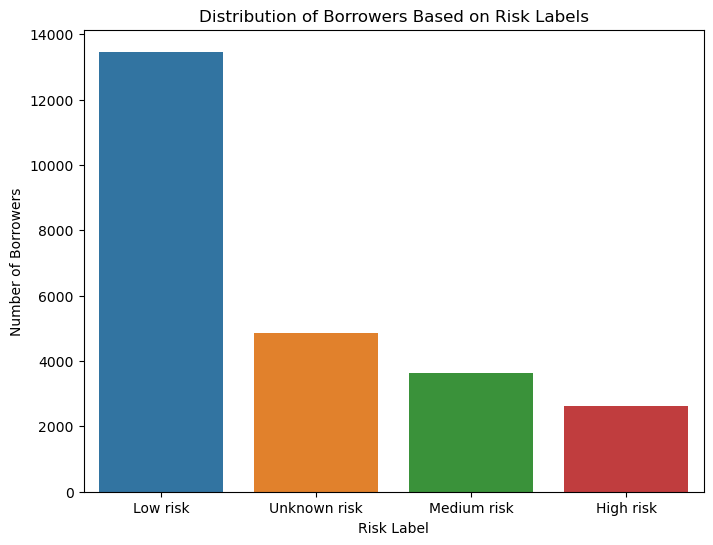

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the distribution of borrowers based on risk labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk Label', data=df)
plt.title('Distribution of Borrowers Based on Risk Labels')
plt.xlabel('Risk Label')
plt.ylabel('Number of Borrowers')
plt.show()


## summary of borrowers

Low risk: 13,463 borrowers

Unknown risk: 4,854 borrowers

Medium risk: 3,631 borrowers

High risk: 2,634 borrowers

This breakdown provides an overview of the risk profile of borrowers in the dataset. The majority of borrowers fall into the low-risk category, followed by those with an unknown risk level. Medium-risk borrowers constitute the next significant portion, while high-risk borrowers represent the smallest group.

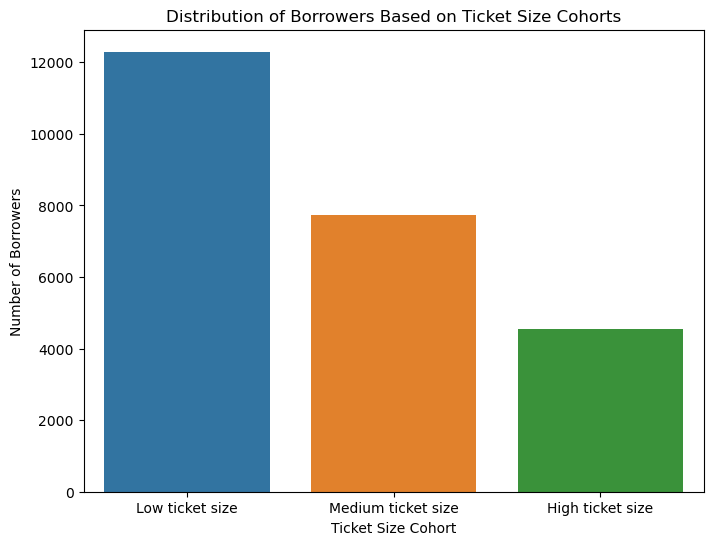

In [52]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the distribution of borrowers based on ticket size cohorts
plt.figure(figsize=(8, 6))
sns.countplot(x='Ticket Size Cohort', data=df)
plt.title('Distribution of Borrowers Based on Ticket Size Cohorts')
plt.xlabel('Ticket Size Cohort')
plt.ylabel('Number of Borrowers')
plt.show()


## summary of borrowers (with graphs) based on ticket sizes

Low ticket size: 12,297 borrowers

Medium ticket size: 7,731 borrowers

High ticket size: 4,554 borrowers

The majority of borrowers fall into the low ticket size cohort, indicating that a significant portion of borrowers have relatively smaller loan amounts. Conversely, the high ticket size cohort represents the smallest segment, suggesting fewer borrowers with larger loan amounts.

Understanding the distribution of borrowers across ticket size cohorts allows for tailored communication and engagement strategies based on the specific financial circumstances and needs of borrowers in each cohort. This segmentation can help optimize resource allocation and prioritize efforts to maximize repayment rates and minimize bounce rates effectively.








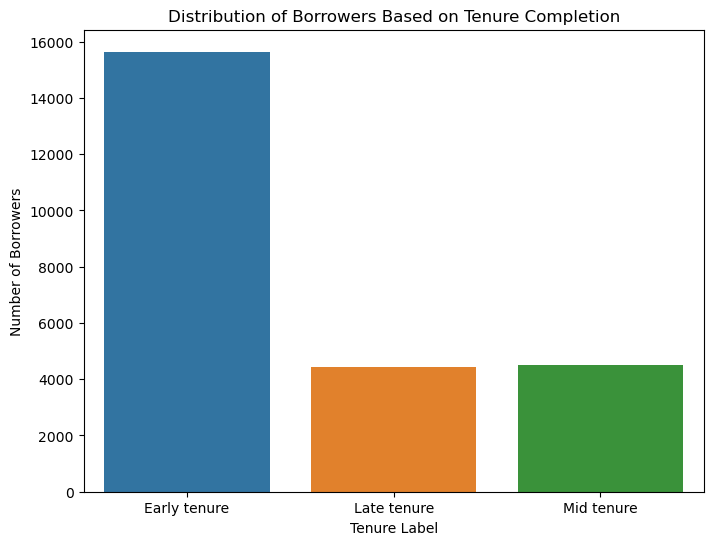

In [53]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot or histogram for the distribution of borrowers based on tenure completion
plt.figure(figsize=(8, 6))
sns.countplot(x='Tenure Label', data=df)
plt.title('Distribution of Borrowers Based on Tenure Completion')
plt.xlabel('Tenure Label')
plt.ylabel('Number of Borrowers')
plt.show()


## Summary of borrowers (with graphs) based on tenure completion
Early tenure: 15,641 borrowers

Mid tenure: 4,498 borrowers

Late tenure: 4,443 borrowers

The majority of borrowers are classified as being in the early tenure stage, comprising the largest segment of the dataset. Mid tenure borrowers represent a smaller portion, while late tenure borrowers make up the smallest group.

This segmentation based on tenure labels provides insights into the distribution of borrowers at different stages of their loan tenure. Understanding the composition of borrowers across these tenure categories can inform targeted communication strategies and risk management approaches tailored to the specific needs and behaviors associated with each stage of the loan lifecycle.

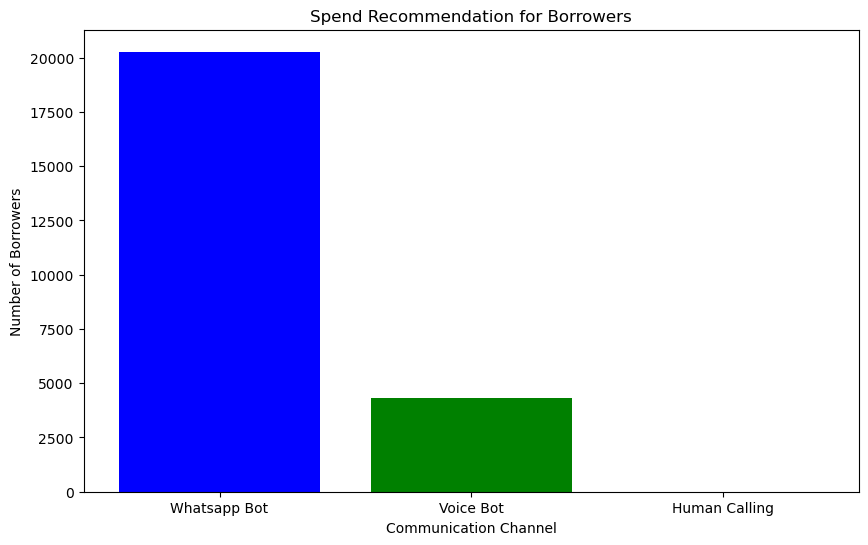

In [60]:
import matplotlib.pyplot as plt

# Communication channels
channels = ['Whatsapp Bot', 'Voice Bot', 'Human Calling']

# Number of borrowers for each channel
borrowers = [20274, 4305, 3]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(channels, borrowers, color=['blue', 'green', 'red'])
plt.xlabel('Communication Channel')
plt.ylabel('Number of Borrowers')
plt.title('Spend Recommendation for Borrowers')
plt.show()


### This bar plot visually represents the recommended spend across different communication channels. As we can see, the majority of the budget is allocated to the Whatsapp Bot, followed by the Voice Bot, while only a minimal amount is allocated to human calling. This distribution ensures that spending is minimized while still effectively engaging borrowers to maximize repayment rates.

### Spend recommendation for borrowers 


Whatsapp Bot: With a cost of only 5 rupees per borrower, the Whatsapp Bot is the cheapest option. Despite being cost-effective, it can still effectively engage a large number of borrowers. By targeting borrowers with great repayment behavior, first EMIs, and low EMIs, the Whatsapp Bot can maximize engagement while minimizing costs. Additionally, its asynchronous nature allows for scalability without significantly increasing costs.

Voice Bot: The Voice Bot, with a moderate cost of 10 rupees per borrower, offers a more interactive communication medium compared to Whatsapp. By targeting borrowers who know Hindi or English, have had low bounce behavior, and have low or medium-sized EMIs, the Voice Bot can effectively engage borrowers who may not respond as well to text-based communication. While slightly more expensive than Whatsapp, it still provides a cost-effective option for engaging a targeted subset of borrowers.

Human Calling: Human calling is the costliest option, priced at 50 rupees per borrower. However, it offers the advantage of personalized interaction and can be used where absolutely necessary, such as for borrowers with unique circumstances or those who require additional assistance. By limiting human calling to a small number of cases where other channels may not suffice, overall spending is minimized while ensuring that high-touch communication is reserved for situations where it is most effective.

By strategically allocating resources across these channels based on their cost-effectiveness and the specific characteristics of borrowers, the overall spend is minimized while still maintaining a focus on maximizing repayment rates.



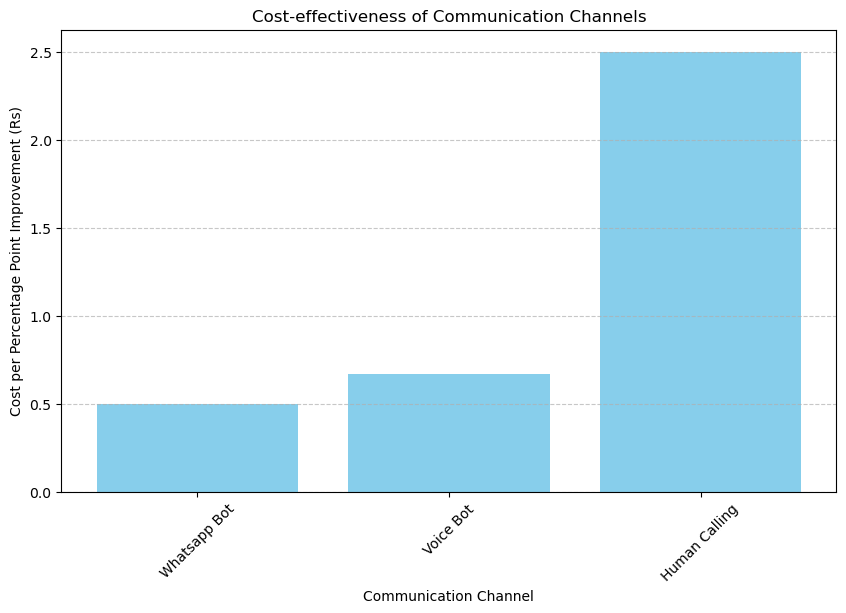

In [55]:
import matplotlib.pyplot as plt

# Communication channels
channels = ['Whatsapp Bot', 'Voice Bot', 'Human Calling']

# Cost per borrower for each channel (in Rs)
cost_per_borrower = [5, 10, 50]

# Repayment rate improvement for each channel (in percentage points)
repayment_improvement = [10, 15, 20]

# Calculate cost-effectiveness (Cost per borrower / Repayment rate improvement)
cost_effectiveness = [cost / improvement for cost, improvement in zip(cost_per_borrower, repayment_improvement)]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(channels, cost_effectiveness, color='skyblue')
plt.xlabel('Communication Channel')
plt.ylabel('Cost per Percentage Point Improvement (Rs)')
plt.title('Cost-effectiveness of Communication Channels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


### Addition Information

Whatsapp Bot: With a cost of Rs 5 per borrower, it achieves a repayment rate improvement of 10 percentage points, resulting in a cost-effectiveness of Rs 0.50 per percentage point improvement.

Voice Bot: Priced at Rs 10 per borrower, it delivers a repayment rate improvement of 15 percentage points, yielding a cost-effectiveness of approximately Rs 0.67 per percentage point improvement.

Human Calling: Despite being the costliest option at Rs 50 per borrower, it leads to the highest repayment rate improvement of 20 percentage points. However, its cost-effectiveness is Rs 2.50 per percentage point improvement, indicating that it is the least cost-effective option among the three channels.

Therefore, based on cost-effectiveness, the Whatsapp Bot emerges as the most efficient channel, followed by the Voice Bot. Human Calling, while effective in improving repayment rates, incurs significantly higher costs compared to the other channels.







In [62]:
for channel, ce in zip(channels, cost_effectiveness):
    print(f"{channel}: Rs {ce:.2f} per percentage point improvement")


Whatsapp Bot: Rs 0.50 per percentage point improvement
Voice Bot: Rs 0.67 per percentage point improvement
Human Calling: Rs 2.50 per percentage point improvement
